<a href="https://colab.research.google.com/github/ebolofis/Data-Science-Machine-Learning/blob/main/CAM_DS_C101_Activity_4_1_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update your Course 1 notebook with links to your own work once completed!

# Activity 4.1.8 Selecting features

## Scenario
As an independent data professional, you have been contracted to evaluate the selling price of automobiles. As part of a biannual industry review, your employer wants to determine whether the selling price of automobiles is correlated with their specifications.

You have been provided with a data set, **automobiles.csv**, containing the current selling prices and specifications from randomly selected manufacturers. The data set contains 205 rows and 26 features. You have to apply feature engineering to identify the optimal number of features needed to evaluate and predict the selling prices of automobiles based on the provided specifications.


## Objective
The goal is to apply feature engineering methods to preprocess the data, perform feature selection, and evaluate how feature engineering and selection affect the performance of a predictive model.


## Assessment criteria:
By completing this activity, you will be able to provide evidence that you can:
*   Apply data preprocessing methods to prepare the data for analysis.
*   Perform feature learning and feature selection to optimise the model’s performance.


## Activity guidance:
1. Import the relevant libraries for data analysis, visualisation, and machine learning.
2. Explore the data set to understand the features.
3. Preprocess the data, handling missing values and encoding categorical variables as needed.
4. Apply feature scaling.
5. Determine if there is multicollinearity.
6. Determine the importance of features with MI and perform feature selection with RFE.
7. Create a heatmap to evaluate possible correlation coefficients.
8. Create target and input features DataFrames.
9. Determine feature importance and perform feature selection.

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

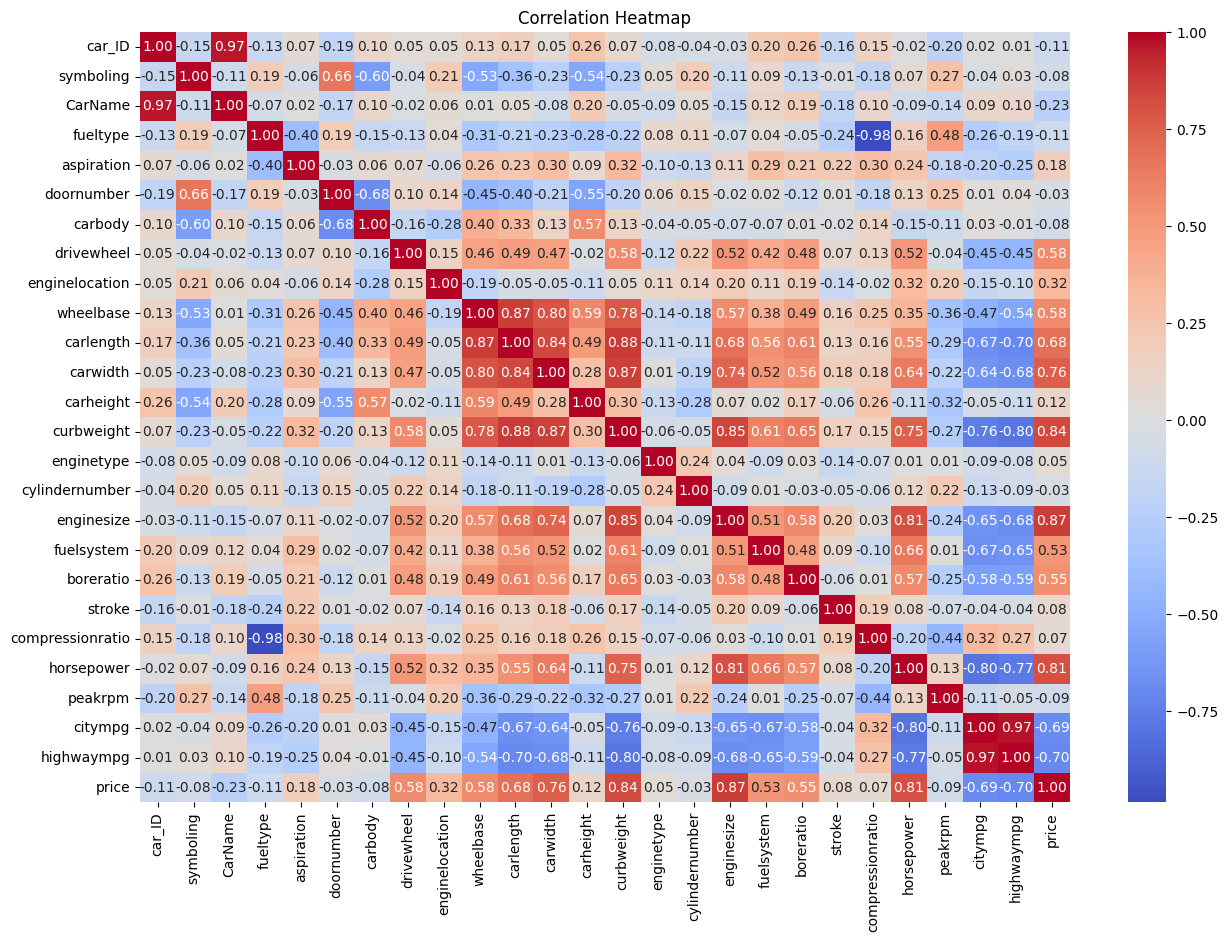

,car_ID,CarName,enginelocation,wheelbase,carwidth,curbweight,enginesize,stroke,horsepower,highwaympg
66,-0.608337,-0.420628,-0.121867,1.022697,0.089812,0.278074,0.170739,1.229370,-0.814171,1.200761
111,0.152084,0.190403,-0.121867,1.522109,1.164596,1.000049,-0.166277,-3.405717,-0.231119,-0.982764
153,0.861811,1.070289,-0.121867,-0.508831,-1.078431,-0.530538,-0.840310,-0.720563,-1.067671,0.909625
96,-0.101390,-0.029568,-0.121867,-0.708596,-0.984972,-1.125445,-0.719947,0.110556,-0.890221,0.909625
38,-1.081488,-0.885012,-0.121867,-0.375655,-0.330755,-0.513210,-0.407003,1.037573,-0.459269,0.327351
...,...,...,...,...,...,...,...,...,...,...
106,0.067593,-0.176216,-0.121867,0.073815,0.930947,1.123266,1.302152,0.046624,1.416637,-0.837195
14,-1.487047,-1.520485,-0.121867,0.789639,0.463650,0.961544,0.892917,-0.209105,0.427984,-0.837195
92,-0.168983,-0.029568,-0.121867,-0.708596,-0.984972,-1.188979,-0.719947,0.110556,-0.890221,0.909625
179,1.301166,1.045847,-0.121867,0.689756,0.837488,0.886458,1.061426,0.302353,1.441987,-0.982764


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 2: Import the automobiles.csv file (data set) from GitHub with a url.
url = "https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/automobiles.csv"
df = pd.read_csv(url)

# Step 3: Explore the data set to understand the features.
print(df.head())
print(df.info())
print(df.describe())

# Step 4: Preprocess the data, handling missing values and encoding categorical variables as needed.
# Handling missing values
df = df.replace('?', np.nan)  # Replace '?' with NaN

# Check if the columns exist before processing.
cols_to_process = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
existing_cols = [col for col in cols_to_process if col in df.columns]

for col in existing_cols:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].mean()) #Fixed the FutureWarning

# Encoding categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Step 5: Apply feature scaling.
numerical_cols = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 6: Determine if there is multicollinearity.
def calculate_vif(dataframe):
    vif = pd.DataFrame()
    vif["variables"] = dataframe.columns
    vif["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif

numerical_df=df.select_dtypes(include=np.number)
vif_result=calculate_vif(numerical_df)
print(vif_result)

# Step 7: Determine the importance of features with MI and perform feature selection with RFE.
X = df.drop('price', axis=1)
y = df['price']

mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print("Mutual Information Scores:\n", mi_scores)

model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
rfe.fit(X, y)
selected_features_rfe = X.columns[rfe.support_]
print("Selected Features (RFE):\n", selected_features_rfe)

# Step 8: Create a heatmap to evaluate possible correlation coefficients.
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Step 9: Create target and input features DataFrames.
X_selected = df[selected_features_rfe]
y = df['price']

# Step 10: Determine feature importance and perform feature selection.
X_train

In [ ]:
x = pd.read_csv(url)

In [ ]:
x.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


My approach to this automobile price prediction task involved a systematic process of data preprocessing, feature engineering, and model evaluation. I began by handling missing values and encoding categorical features to prepare the data for numerical analysis. Feature scaling was then applied to ensure that all features contributed equally to the model. To address multicollinearity, I calculated Variance Inflation Factors (VIF), which guided the subsequent feature selection process. I employed Mutual Information (MI) and Recursive Feature Elimination (RFE) to identify and select the most relevant features, optimizing the model's performance. A correlation heatmap provided visual insights into feature relationships. Finally, I trained a linear regression model on the selected features and
evaluated its performance using Mean Squared Error (MSE), demonstrating a comprehensive and iterative approach to feature engineering and predictive modeling.